# Visualizing the Laplacian Eigenspectrum
There are a few graphs in both datasets that are consistently very dissimilar to the other graphs in the dataset regardless of which metric we use to calculate dissimilarity. Here, we attempt to investigate why by looking at their eigenspectra.  We use the [Duke Mouse Whole-Brain Connectomes](https://microsoft.github.io/graspologic/latest/reference/reference/datasets.html#graspologic.datasets.load_mice) dataset from Graspologic where the networks are matched.

First, let's load the data.

In [1]:
# HIDE CELL
import numpy as np

# load the full mouse dataset
from graspologic.datasets import load_mice
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)
print(graphs.shape)

# initialize labels
labels = {}
for i in np.arange(0, 332):
    labels[i] = i

(32, 332, 332)


After applying the pass-to-ranks transformation on each of the graphs and without smoothing the eigenvalues, let's find the Laplacian eigenspectrum for each of the graphs.

In [3]:
from graspologic.utils import pass_to_ranks, to_laplacian

eigs = []
for i, graph in enumerate(graphs):
    # calculate laplacian after pass-to-ranks transfomration
    graph = pass_to_ranks(graph)
    lap = to_laplacian(graph, 'I-DAD')

    # find and sort eigenvalues
    w = np.linalg.eigvals(lap)
    w = np.sort(w)
    eigs.append(w)

print(len(eigs))

32


Setting the first graph (index 0) in the dataset as our point of comparison, we find the graph that is the most similar and the graph that is the most dissimilar based on the $L^1$-norm of the difference vector between node degrees. 

In [8]:
from utils import calculate_dissim

scaled_dissim = calculate_dissim(graphs, method="degree", norm="l1", normalize=True)

sim_idx = np.argmin(scaled_dissim[0, 1:]) + 1
dissim_idx = np.argmax(scaled_dissim[0, 1:]) + 1

print(sim_idx)
print(dissim_idx)

2
23


We find that the most similar graph is the 3rd graph (index 2), and the most dissimilar graph is the 24th graph (index 23).

We visualize the eigenspectra in two ways - based on its sorted index and based on its density (frequency).

## Based on Sorted Index

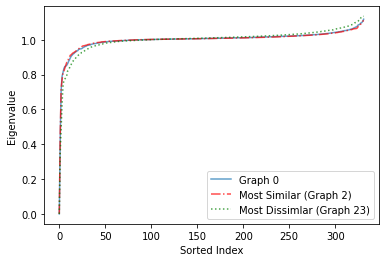

In [6]:
# HIDE CODE
import matplotlib.pyplot as plt

plt.figure(facecolor='w')
plt.plot(eigs[0], alpha=0.7, label = 'Graph 0')
plt.plot(eigs[2], 'r-.', alpha=0.7, label='Most Similar (Graph 2)')
plt.plot(eigs[23], 'g:', alpha=0.7, label='Most Dissimlar (Graph 23)')
plt.xlabel('Sorted Index')
plt.ylabel('Eigenvalue')
plt.legend()

## Based on Density

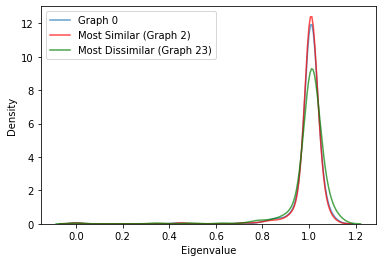

In [7]:
# HIDE CODE
import seaborn as sns

plt.figure(facecolor='w')
sns.kdeplot(eigs[0], alpha=0.7, label='Graph 0')
sns.kdeplot(eigs[2], color='red', alpha=0.7, label='Most Similar (Graph 2)')
sns.kdeplot(eigs[23], color='green', alpha=0.7, label='Most Dissimilar (Graph 23)')
plt.xlabel('Eigenvalue')
plt.legend()

We observe from both plots (more clearly from the plot based on density) that the eigenspectrum of the most similar graph based on the $L^1$-norm of the difference vector based on node degrees is very similar to Graph 0, whereas the eigenspectrum of the most dissimilar graph is very different from Graph 0. Even though we used a different metric to determine the most similar and dissimilar graph, we find that this carries over to their eigenspectra. Even though this finding is interesting and is a good start, itdoes not completely answer our question of why some graphs are very dissimilar to other graphs regardless of the metric we use, so further investigation is needed.